In [1]:
import pandas as pd
import seaborn as sns

In [7]:
df = pd.read_csv('Mental-Health-Twitter.csv')
df

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0
19996,19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0
19997,19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0
19998,19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0


In [11]:
df_sample1 = df.drop(columns=['Unnamed: 0', 'post_id', 'post_created', 'post_text', 'retweets'])
df_sample1

,user_id,followers,friends,favourites,statuses,label
0,1013187241,84,211,251,837,1
1,1013187241,84,211,251,837,1
2,1013187241,84,211,251,837,1
3,1013187241,84,211,251,837,1
4,1013187241,84,211,251,837,1
...,...,...,...,...,...,...
19995,1169875706,442,230,7,1063601,0
19996,1169875706,442,230,7,1063601,0
19997,1169875706,442,230,7,1063601,0
19998,1169875706,442,230,7,1063601,0


In [18]:
df_sample2 = df_sample1.drop_duplicates()
df_sample3 = df_sample2.drop(columns = ['user_id'])
df_sample3

,followers,friends,favourites,statuses,label
0,84,211,251,837,1
243,189,169,698,3694,1
893,132,85,1807,2519,1
922,17,54,155,108,1
978,1206,2143,39008,950,1
...,...,...,...,...,...
17611,465,189,80,31009,0
17723,44,69,2228,5923,0
17854,11,13,573,1819,0
18047,1197,701,1156,61856,0


            followers   friends  favourites  statuses     label
followers    1.000000  0.961716   -0.001950 -0.015782  0.075795
friends      0.961716  1.000000   -0.014790 -0.027550  0.087207
favourites  -0.001950 -0.014790    1.000000 -0.018354 -0.072604
statuses    -0.015782 -0.027550   -0.018354  1.000000 -0.257473
label        0.075795  0.087207   -0.072604 -0.257473  1.000000


<AxesSubplot:>

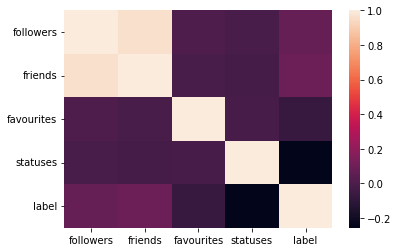

In [19]:
df4heatmaps = df_sample3

# Compute the correlation matrix 
corr = df4heatmaps.corr()
# Print the correlation matrix
print(corr)
# Draw the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [20]:
nvar_list = ['followers', 'friends', 'favourites', 'statuses']
cvar_list = ['label']

In [29]:
df_sample4 = df_sample3.copy()
df_sample4[nvar_list] = (df_sample1[nvar_list] - df_sample1[nvar_list].mean())/df_sample1[nvar_list].std()


# Set the datatype for the variables in the cvar_list to be categorical in Python
# Set the datatype for the variables in the nvar_list to be numerical in Python 
df_sample5 = df_sample4.copy()
df_sample5[cvar_list] = df_sample4[cvar_list].astype('category')
df_sample5[nvar_list] = df_sample4[nvar_list].astype('float64')
df_sample5
# # Convert the categorical variables into dummies (Step 1 of dummy coding)
# # prefix_sep is the sympol used to create the dummy variable names.
# df_sample6 = df_sample5.copy()
# df_sample6 = pd.get_dummies(df_sample5, prefix_sep='_')
# df_sample6

# # Remove the redundant dummies (Step 2 of dummy coding)
# # Placeholder variable: rdummies
# rdummies = ['label_0']
# df_sample7 = df_sample6.copy()
# df_sample7 = df_sample6.drop(columns=rdummies)
# df_sample7

,followers,friends,favourites,statuses,label
0,-0.429748,-0.311436,-0.732418,-0.309404,1
243,-0.374482,-0.334327,-0.679160,-0.289110,1
893,-0.404484,-0.380108,-0.547027,-0.297456,1
922,-0.465013,-0.397003,-0.743856,-0.314582,1
978,0.160805,0.741529,3.885319,-0.308601,1
...,...,...,...,...,...
17611,-0.229212,-0.323427,-0.752792,-0.095081,0
17723,-0.450801,-0.388828,-0.496866,-0.273276,0
17854,-0.468171,-0.419349,-0.694053,-0.302428,0
18047,0.156068,-0.044380,-0.624591,0.124036,0


In [30]:
# Part 5 Data Partiton

from sklearn.model_selection import train_test_split

# Placeholder variables: df4partition, testpart_size
# test_size specifies the percentage for the test partition
df4partition = df_sample5
testpart_size = 0.2

# random_state specifies the seed for random number generator. 
# random_state = 1 unless otherwised noted
df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

In [31]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
# Separate the predictor values and the DV values into X and y respectively
DV = 'label'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

def summary_coef(model_object):
  n_predictors = X.shape[1]
  model_coef = pd.DataFrame(model_object.coef_.reshape(1, n_predictors), columns=X.columns.values)
  model_coef['Intercept'] = model_object.intercept_
  return model_coef.transpose()

In [37]:
# Run Logistic regression with k-fold cross validation with k=5
# Placeholder variable: kfolds
kfolds = 5

# Here we specify within which range of the penalty levels we will search for the optimal penalty level, 
# i.e., the level that leads to the best model candidate
# We search the optimal alpha within [min_alpha, max_alpha]
min_alpha = 0.001
max_alpha = 100

# We further discretize the continuous alpha range [min_alpha, max_alpha] into n individual points of alpha
# We train n model candidates each of which corresponds to one individual alpha point
n_candidates = 1000

import numpy as np

# We store the list of individual alpha points into alpha_list
alpha_list = list(np.linspace(min_alpha, max_alpha, num=n_candidates))

# C_list is the element-wise inverse of alpha_list. It is required as one of the paramater values for LogisticRegressionCV
C_list = list(1/np.linspace(min_alpha, max_alpha, num=n_candidates))

# Set n_jobs to be -1 to run LogisticRegressionCV on all CPU cores.
clf_optimal = LogisticRegressionCV(Cs=C_list, cv=kfolds, penalty='l1', solver='saga', max_iter=8000, random_state=1, n_jobs=-1).fit(X,y)

# Display the estimated coefficients of the final selected model
print(summary_coef(clf_optimal))

# Display the optimal alpha that yields the final selected model (the best model candidate)
print(1/clf_optimal.C_)

# Calcuate the error rate over the test partition based on the final selected model

# y_test_actual is the actual values of the DV in the test partition
y_test_actual = df_testData[DV]

# X_test is the predictor values in the test partition
X_test = df_testData.drop(columns=[DV])

# Use predict method of the clf_optimal object to apply the model associated with clf_optimal to the test partition
# y_test_predicted is the predicted values of the DV in the test partition 
y_test_predicted = clf_optimal.predict(X_test)

# Import the metrics package
from sklearn import metrics

# Display the confusion matrix over the test partition
print(metrics.confusion_matrix(y_test_actual, y_test_predicted))

# Display the accuracy over the test partition
print(clf_optimal.score(X_test, y_test_actual))


                   0
followers   0.384713
friends     1.401800
favourites -0.315330
statuses   -8.110002
Intercept  -0.655862
[0.001]
[[ 0  3]
 [ 1 11]]
0.7333333333333333
